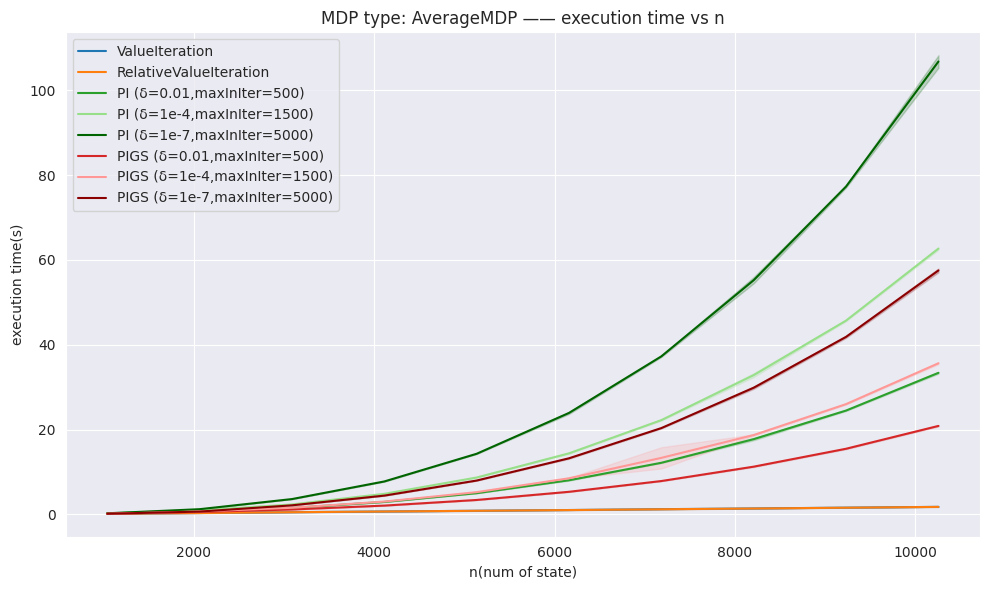

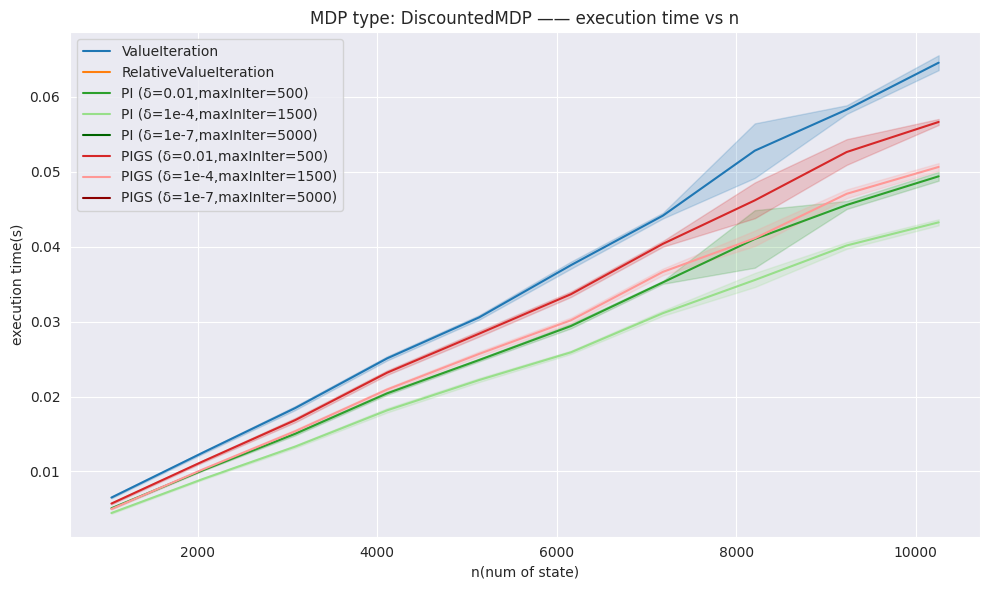

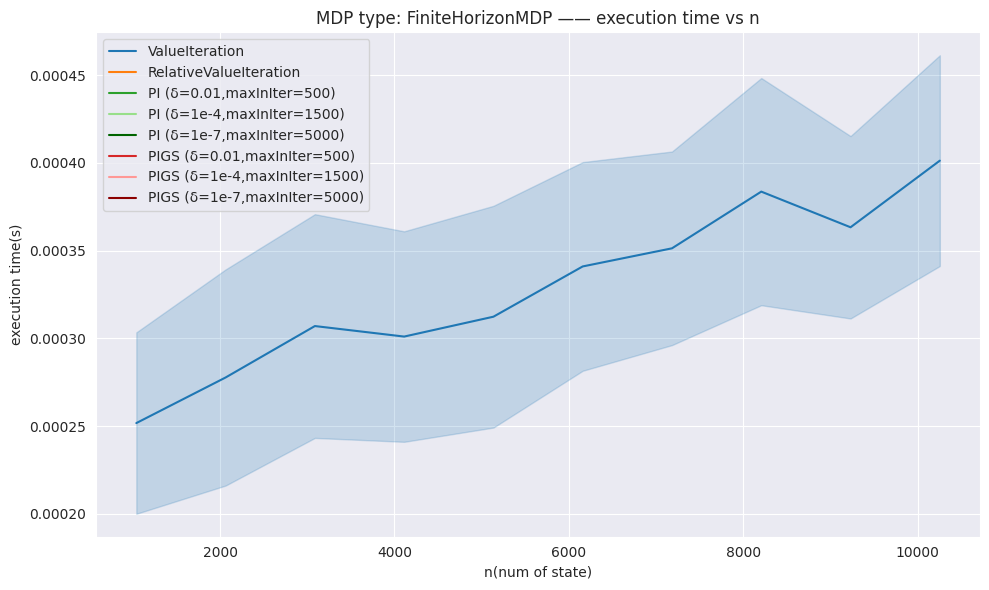

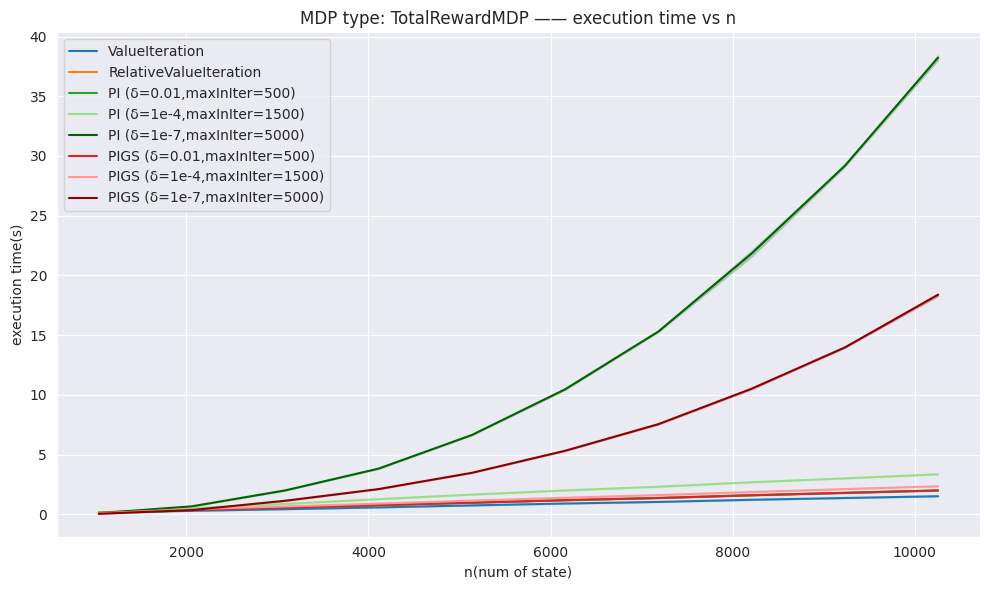

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("Updated_Dataset.csv")
df.head()

color_dict = {
    "VI": "#1f77b4", "RVI": "#ff7f0e",
    "PI1": "#2ca02c", "PI2": "#98df8a", "PI3": "#006400",
    "PIGS1": "#d62728", "PIGS2": "#ff9896", "PIGS3": "#8B0000",
}

label_dict = {
    "VI": "ValueIteration",
    "RVI": "RelativeValueIteration",
    "PI1": "PI (δ=0.01,maxInIter=500)",
    "PI2": "PI (δ=1e-4,maxInIter=1500)",
    "PI3": "PI (δ=1e-7,maxInIter=5000)",
    "PIGS1": "PIGS (δ=0.01,maxInIter=500)",
    "PIGS2": "PIGS (δ=1e-4,maxInIter=1500)",
    "PIGS3": "PIGS (δ=1e-7,maxInIter=5000)",
}

mdp_types = df["type"].unique()

for mdp in mdp_types:
    plt.figure(figsize=(10, 6))
    subdf = df[df["type"] == mdp]

    for algo in ["VI", "RVI", "PI1", "PI2", "PI3", "PIGS1", "PIGS2", "PIGS3"]:
        time_col = f"time_{algo}"
        if time_col in subdf.columns:
            grouped = subdf.groupby("n")[time_col]
            avg_time = grouped.mean()
            std_time = grouped.std()
            if not avg_time.empty:
                x = avg_time.index[:10]
                y = avg_time.values[:10]
                yerr = std_time.values[:10]

                plt.plot(x, y, label=label_dict.get(algo, algo), color=color_dict.get(algo, None))
                plt.fill_between(x, y - yerr, y + yerr, color=color_dict.get(algo, "#ccc"), alpha=0.2)

                
                

    plt.title(f"MDP type: {mdp} —— execution time vs n")
    plt.xlabel("n(num of state)")
    plt.ylabel("execution time(s)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
